In [63]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime
import plotly.express as px
import operator

In [3]:
df=pd.read_csv('first.csv')

In [13]:
unique,count=np.unique(df['PHONE'],return_counts=True)

In [42]:
duration=[]
for i in range(100):
    start=datetime.datetime.strptime(df['START'][i],'%Y-%m-%d %H:%M:%S')
    end=datetime.datetime.strptime(df['END'][i],'%Y-%m-%d %H:%M:%S')
    duration.append((end-start).total_seconds())

In [43]:
duration

[0.0,
 3027.0,
 4081.0,
 1867.0,
 1098.0,
 2392.0,
 0.0,
 289.0,
 0.0,
 4946.0,
 5389.0,
 3127.0,
 0.0,
 3351.0,
 2144.0,
 2024.0,
 623.0,
 0.0,
 3207.0,
 626.0,
 0.0,
 0.0,
 0.0,
 3250.0,
 2564.0,
 0.0,
 0.0,
 1575.0,
 0.0,
 5381.0,
 0.0,
 2193.0,
 1428.0,
 0.0,
 0.0,
 2116.0,
 0.0,
 0.0,
 0.0,
 4844.0,
 5382.0,
 400.0,
 0.0,
 3647.0,
 1085.0,
 1606.0,
 2466.0,
 4591.0,
 0.0,
 4486.0,
 3027.0,
 0.0,
 4801.0,
 1775.0,
 924.0,
 4188.0,
 0.0,
 1893.0,
 0.0,
 50.0,
 4853.0,
 0.0,
 0.0,
 0.0,
 4323.0,
 2984.0,
 1869.0,
 5008.0,
 424.0,
 5186.0,
 0.0,
 1436.0,
 4216.0,
 3265.0,
 2478.0,
 3021.0,
 4.0,
 0.0,
 0.0,
 0.0,
 0.0,
 17.0,
 813.0,
 4613.0,
 0.0,
 3313.0,
 2767.0,
 0.0,
 2999.0,
 0.0,
 0.0,
 3291.0,
 3801.0,
 0.0,
 1300.0,
 0.0,
 466.0,
 0.0,
 0.0,
 0.0]

In [66]:
callee_duration={}
for i in range(100):
    if(str(df['PHONE'][i]) in callee_duration):
        callee_duration[str(df['PHONE'][i])]+=duration[i]
    else:
        callee_duration[str(df['PHONE'][i])]=duration[i]

In [67]:
callee_duration.values()

TypeError: 'dict_values' object is not subscriptable

In [64]:
callee_duration= dict( sorted(callee_duration.items(), key=operator.itemgetter(1),reverse=True))

<BarContainer object of 24 artists>

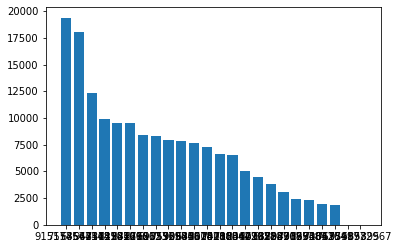

In [65]:
plt.bar(callee_duration.keys(),callee_duration.values())

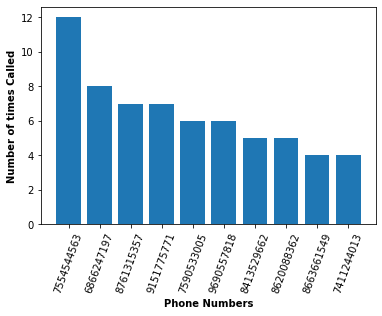

In [56]:
def frequency():
    numbers=df['PHONE'].astype('str').value_counts().head(10).index
    freq=df['PHONE'].value_counts().head(10)
    plt.bar(numbers,freq)
    plt.xticks(numbers,numbers,rotation=70)
    plt.ylabel('Number of times Called',weight='bold')
    plt.xlabel('Phone Numbers',weight='bold')
frequency()

<BarContainer object of 4 artists>

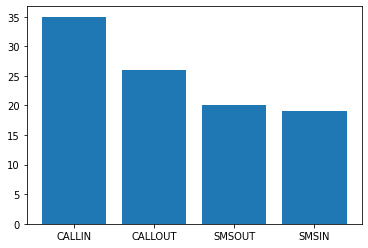

In [98]:
def typeofcall():
    plt.bar(df['TYPE'].value_counts().index,df['TYPE'].value_counts())

In [79]:
duration=[]
daynight=[]
for i in range(100):
    start=datetime.datetime.strptime(df['START'][i],'%Y-%m-%d %H:%M:%S')
    end=datetime.datetime.strptime(df['END'][i],'%Y-%m-%d %H:%M:%S')
    duration.append(end-start)
    if(start.hour<20 and start.hour>4):
        daynight.append('DAY')
    else: 
        daynight.append('NIGHT')
df['DURATION']=duration        
df['DAY/NIGHT']=daynight

In [80]:
px.scatter_geo(df['PHONE'],lat=df['LATITUDE'],lon=df['LONGITUDE'],color=df['DAY/NIGHT'])

In [81]:
second=[]
for i in df['DURATION']:
    second.append(i.total_seconds())
px.scatter_geo(df['PHONE'],lat=df['LATITUDE'],lon=df['LONGITUDE'],color=second)

In [89]:
imei=[]
for i in df['IMEI1']:
    imei.append(str(i))
px.scatter_geo(df['PHONE'],lat=df['LATITUDE'],lon=df['LONGITUDE'],color=imei)

In [91]:
px.scatter_geo(df['PHONE'],lat=df['LATITUDE'],lon=df['LONGITUDE'],color=df['TYPE'])

In [96]:
unique, counts = np.unique(df['PHONE', return_counts= True)
#px.scatter_geo(df['PHONE'],lat=df['LATITUDE'],lon=df['LONGITUDE'],color=df['DAY/NIGHT'])

SyntaxError: invalid syntax (<ipython-input-96-fa74c2359f01>, line 1)

In [67]:
df

,PHONE,IMEI1,IMEI2,TYPE,START,END,TOWER,LATITUDE,LONGITUDE,OPERATORS,DURATION,DAY/NIGHT
0,8620088362,321807395986361,862016283265046,SMSIN,2007-02-25 06:08:57,2007-02-25 06:08:57,97498330,-22.955500,130.975584,Vodafone,0 days 00:00:00,DAY
1,6866247197,246495093731280,686630943293962,CALLIN,2007-05-05 09:09:42,2007-05-05 10:00:09,33191847,-34.126077,130.929028,Airtel,0 days 00:50:27,DAY
2,8413529662,246495093731280,841361814625519,CALLOUT,2007-07-16 19:40:33,2007-07-16 20:48:34,13983157,-27.214447,136.368209,Vodafone,0 days 01:08:01,DAY
3,7554544563,963617088738152,755461624047917,CALLIN,2007-07-18 14:38:06,2007-07-18 15:09:13,41040135,-27.077548,127.074613,Airtel,0 days 00:31:07,DAY
4,8663661549,963617088738152,866372352705663,CALLOUT,2007-09-27 10:04:25,2007-09-27 10:22:43,45411244,-24.248271,129.293863,Airtel,0 days 00:18:18,DAY
...,...,...,...,...,...,...,...,...,...,...,...,...
95,9151775771,321807395986361,915186653781363,SMSIN,2020-10-14 13:30:38,2020-10-14 13:30:38,70849838,42.603647,-97.702708,BSNL,0 days 00:00:00,DAY
96,7735748326,963617088738152,773584402127345,CALLOUT,2021-04-17 11:32:31,2021-04-17 11:40:17,80123504,40.592852,-97.096902,Idea,0 days 00:07:46,DAY
97,8413529662,246495093731280,841361814625420,SMSOUT,2021-05-15 20:55:33,2021-05-15 20:55:33,55660361,33.563603,-92.472512,Airtel,0 days 00:00:00,NIGHT
98,7554544563,246495093731280,755462777836030,SMSIN,2021-07-05 08:04:20,2021-07-05 08:04:20,14204610,40.397495,-90.542764,Jio,0 days 00:00:00,DAY


In [ ]:
'''import plotly.express as px
df = px.data.gapminder().query("year==2007")
fig = px.scatter_geo(df, locations="iso_alpha", color="continent",
                     hover_name="country", size="pop",
                     projection="natural earth")
fig.show()'''